In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe
import h5py
import os
# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
../../python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [2]:
# Load the net, list its data and params, and filter an example image.
caffe.set_device(0)
caffe.set_mode_gpu()

### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.SGDSolver('lenet_auto_solver.prototxt')



netroger = caffe.Net('conv.prototxt', caffe.TRAIN)
print("blobs {}\nparams {}".format(netroger.blobs.keys(), netroger.params.keys()))

print netroger.blobs['conv'].data.shape
print netroger.blobs['conv'].diff.shape

print netroger.blobs['conv'].count

#print netroger.blobs['upscore'].data.shape
#print netroger.blobs['upscore'].diff.shape

print netroger.layers



blobs ['data', 'label', 'data_data_0_split_0', 'data_data_0_split_1', 'conv', 'pool1', 'upscore', 'score', 'loss']
params ['conv', 'upscore']
(10, 3, 14, 30, 30)
(10, 3, 14, 30, 30)
378000


In [3]:
misblobs=netroger.blobs.keys()
for i in xrange(len(misblobs)):
    print misblobs[i]
    print netroger.blobs[misblobs[i]].data.shape 

data
(10, 1, 16, 32, 32)
label
(10, 16, 32, 32)
data_data_0_split_0
(10, 1, 16, 32, 32)
data_data_0_split_1
(10, 1, 16, 32, 32)
conv
(10, 3, 14, 30, 30)
pool1
(10, 3, 13, 29, 29)
upscore
(10, 5, 27, 59, 59)
score
(10, 5, 16, 32, 32)
loss
()


In [4]:
netroger.forward()
netroger.backward()
src=netroger.blobs['data']
g = src.diff[0]

diffs = netroger.backward(diffs=['data','conv'])

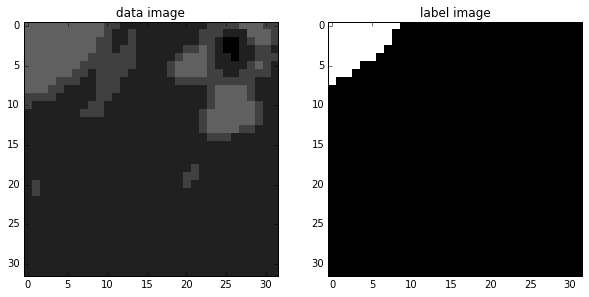

In [5]:
idrandom=np.random.randint(10)

testdata= netroger.blobs['data'].data.shape
plt.figure()
plt.subplot(1,2,1)
plt.title("data image")
filt_min, filt_max = netroger.blobs['data'].data.min(), netroger.blobs['data'].data.max()
plt.imshow(netroger.blobs['data'].data[idrandom, 0,10,:,:], vmin=filt_min, vmax=filt_max)

plt.subplot(1,2,2)
plt.title("label image")
plt.imshow(netroger.blobs['label'].data[idrandom,10,:,:])


#print np.unique(dataimg)

In [ ]:
%%time
niter = 10000
test_interval = 25
# losses will also be stored in the log
train_loss = np.zeros(niter)
#test_acc = zeros(int(np.ceil(niter / test_interval)))
output = np.zeros((niter, 8, 10))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    #solver.test_nets[0].forward(start='conv1')
    #output[it] = solver.test_nets[0].blobs['score'].data[:8]
    


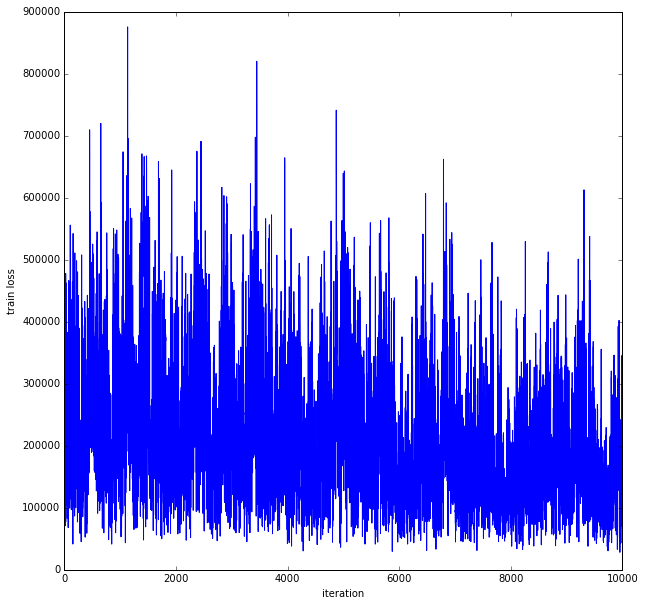

In [7]:
_, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
#ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
#ax2.set_ylabel('test accuracy')
#ax2.set_title('Test Accuracy: {:.2f}'.format(test_acc[-1]))